<a href="https://colab.research.google.com/github/JSRV18/Dinosaurio-repository/blob/main/Buena_Tarea_interpolaci%C3%B3n_parte_dinosaurio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

x=np.array([0.1, 0.6, 1.1])

def f_1(x):
  return np.sqrt(np.tan(x))

y=np.array(f_1(x))
X=sym.Symbol('x', real=True)

def Bases_cardinales(x,X,i):
  base=1
  for j in range(len(x)):
    if j!=i:
      base *= (((X-x[j])/(x[i]-x[j])))
  return base

In [ ]:
Bases_cardinales(x,X,0)

(1.1 - 1.0*x)*(1.2 - 2.0*x)

In [ ]:
def Poly_Interpolacion(x,y,X):
  poly=0
  for i in range(len(y)):
    poly += y[i]*Bases_cardinales(x,X,i)
  return poly

In [ ]:
def obtener_coeficientes(x):
  C=np.zeros(len(x))
  for i in range(len(x)):
    C[i]=sym.diff(Bases_cardinales(x,X,i)).subs(X,0)

  return C
f=obtener_coeficientes(x)
print(f)


[-3.4  4.8 -1.4]


In [ ]:
""" Ecuación de la derivada Progresiva: (-17f(x+0.1h)+24f(x+0.6h)-7f(x+1.1h))/5h """

' Ecuación de la derivada Progresiva: (-17f(x+0.1h)+24f(x+0.6h)-7f(x+1.1h))/5h '

In [ ]:
Poly=Poly_Interpolacion(x,y,X)
Poly=Poly.expand()
Poly

0.128408146479789*x**2 + 0.930852584024414*x + 0.222387147178331

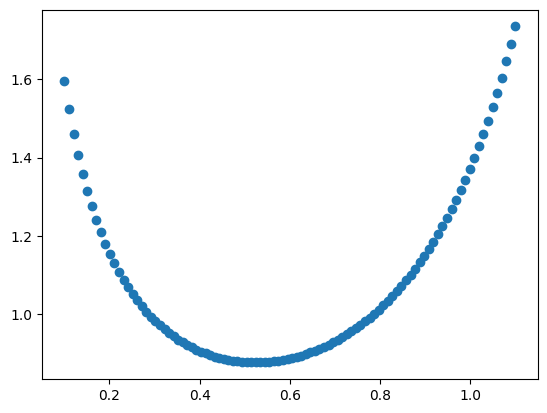

In [ ]:
# Punto 2. Derivada central
x2=np.linspace(0.1, 1.1, 100)
def derivada_central(f,x,h=0.01):
  return (f(x+h)-f(x-h))/(2*h)

y=derivada_central(f_1,x2)
plt.scatter(x2,y)
plt.show()

In [ ]:
# Punto error

xr=np.array([100, 121, 144])
def f(x):
  return np.sqrt(x)

yr=np.array(f(x))


In [ ]:
X= sym.Symbol('x', real=True)

In [ ]:
def Bases_cardinales(xr,X,i):
  base=1
  for j in range(len(xr)):
    if j!=i:
      base *= (((X-xr[j])/(xr[i]-xr[j])))
  return base

In [ ]:
def poly(xr,yr,X):
  poly=0
  for i in range(len(yr)):
    poly += yr[i]*Bases_cardinales(xr,X,i)
  return poly

In [ ]:
Poly=poly(xr,yr,X)
Poly=Poly.expand()
Poly

-0.000225109590469829*x**2 + 0.0715763101235773*x - 4.5903073416426

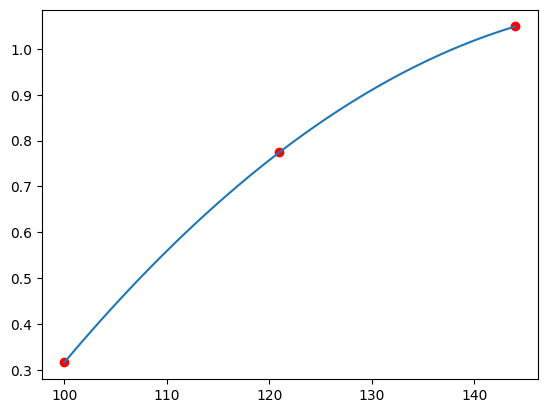

[0.31622777 0.33989101 0.36319124 0.38612843 0.4087026  0.43091375
 0.45276187 0.47424696 0.49536903 0.51612807 0.53652409 0.55655708
 0.57622705 0.59553399 0.61447791 0.6330588  0.65127666 0.6691315
 0.68662331 0.7037521  0.72051786 0.7369206  0.75296031 0.76863699
 0.78395065 0.79890129 0.8134889  0.82771348 0.84157504 0.85507357
 0.86820908 0.88098156 0.89339101 0.90543744 0.91712085 0.92844123
 0.93939858 0.94999291 0.96022421 0.97009249 0.97959774 0.98873996
 0.99751916 1.00593534 1.01398849 1.02167861 1.02900571 1.03596978
 1.04257083 1.04880885]


In [ ]:


x1=np.linspace(xr[0], xr[-1], 50)
y1=poly(xr,yr,x1)
plt.plot(x1,y1)
plt.scatter(xr,yr, color="r")
plt.show()
print(y1)

In [ ]:
Error=f(114)-poly(xr,yr,114)
print(Error)

10.033210477332


In [ ]:
def Cuarta_Derivada(f,x,h=0.01):
  return (f(x+2*h)-4*f(x+h)+6*f(x)-4*f(x-h)+f(x-2*h))/(h**4)

In [ ]:
Xe = sym.Symbol('x', real=True)
Xe

x

In [ ]:
def Calcular_error(Xe,xr):
  for i in range(len(xr)):
    return ((Cuarta_Derivada(f,Xe))/(np.math.factorial((len(xr)+1))))*(Xe-xr[i])
a=Calcular_error(114,xr)
print(a)

3.1086244689504383e-07


<ipython-input-18-924ed50521cc>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return ((Cuarta_Derivada(f,Xe))/(np.math.factorial((len(xr)+1))))*(Xe-xr[i])


In [ ]:
# Bala
x_b = np.array([1.4, 3.5, 5.6])
y_b = np.array([0.4007954931819738 ,0.594128102489774 ,0.29802795523938164])

X= sym.Symbol('x', real=True)

def base_cardinale(x,X,i):
  base=1
  for j in range(len(x_b)):
    if j!=i:
      base *= (((X-x_b[j])/(x_b[i]-x_b[j])))
  return base

In [ ]:
def polinomio_interpolacion(x,y,X):
  poly=0
  for i in range(len(y_b)):
    poly += y_b[i]*base_cardinale(x_b,X,i)
  return poly


0.5968232769758175


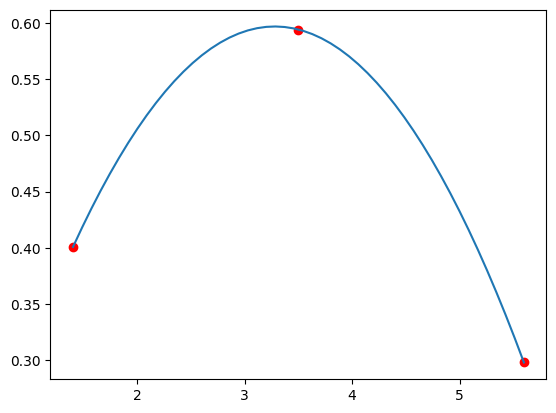

In [ ]:

x_p=np.linspace(x_b[0], x_b[-1], 50)
y_p=polinomio_interpolacion(x_b,y_b,x_p)
print(np.max(y_p))
plt.plot(x_p,y_p)
plt.scatter(x_b,y_b, color="r")
plt.show()

In [ ]:
poly=polinomio_interpolacion(x_b,y_b,X)
poly=poly.expand()
poly

-0.0554912422401579*x**2 + 0.363970234266202*x

0.596825400206689

In [ ]:
X_max = 0.363970234266202/(2*0.0554912422401579)
X_max

3.2795286208496885

In [ ]:
g=9.8

In [ ]:
Vy=np.sqrt(2*(g)*(np.max(y_b)))
Vy

3.4124640377298587

In [ ]:
Ti=Vy/g
Ti

0.3482106160948835

In [ ]:
Vx=(X_max)/Ti
Vx

9.41823272830962

In [ ]:
Vo=round(np.sqrt((Vy**2)+(Vx**2)))
Vo

10

In [ ]:
Theta=np.arctan(Vy/Vx)
Theta

0.34761257326103256

In [ ]:
Radianes=round(Theta*180/np.pi)
Radianes

20